In [1]:
import numpy as np
import cv2
import time
import glob

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
x = []
masks = []
for m in glob.glob('**/mask*.png', recursive=True):
    masks.append(cv2.imread(m, cv2.IMREAD_GRAYSCALE))
for i in glob.glob('**/image*.png', recursive=True):
    x.append(cv2.imread(i))

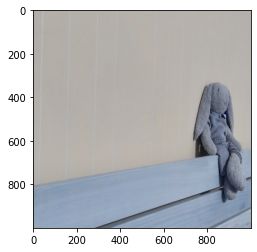

In [4]:
plt.imshow(x[0])

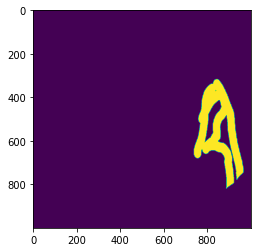

In [5]:
plt.imshow(masks[0])

In [6]:
x[0].shape

(1000, 1000, 3)

In [7]:
alpha = 1
beta = 1
q = np.array([q.append(alpha*(1-np.where(m>0, 1, m))) for m in masks])

    
g = []
for i in range(1000):
    g_i = {}
    for j in range(1, 1000):
        g_i[j-1, j] = np.zeros((5, 5))
        for k in range(5):
            for m in range(k+1, 5):
                n1=np.sum(np.abs(x[k][i,j-1]-x[m][i,j-1]))
                n2=np.sum(np.abs(x[k][i,j]-x[m][i,j]))
                g_i[j-1, j][k, m] = g_i[j-1, j][m, k] = beta*(n1+n2)
    g.append(g_i)

NameError: name 'q' is not defined

In [8]:
flast = []
for i in range(1000):
    filast = []
    for j in range(5):
        filast.append(np.min(q[:,i, 999]+ g[i][998,999][j,:]))

NameError: name 'q' is not defined